In [3]:
# ② 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [4]:
# ③ 데이터 불러오기
df = pd.read_csv('/aiffel/aiffel/time_series_basic/Daily_Demand_Forecasting_Orders.csv', delimiter=';')

In [5]:
# ④ 데이터 확인
df.columns

Index(['Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [7]:
df.shape

(60, 13)

In [8]:
# ④ 데이터 확인 및 시각화
data = df['Target (Total orders)']

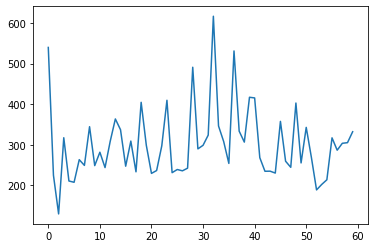

In [10]:
plt.plot(data)
plt.show()

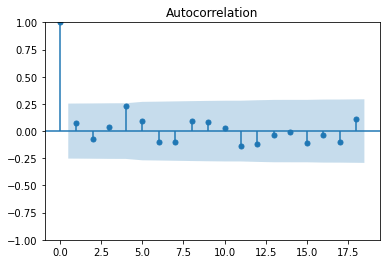

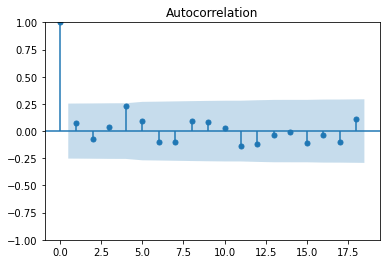

In [11]:
# ⑤ ACF를 통한 데이터 확인 및 시각화
plot_acf(data)

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


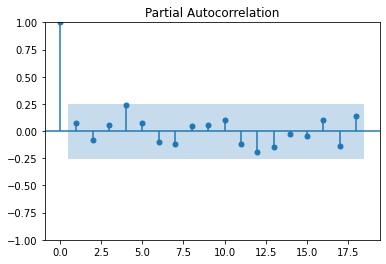

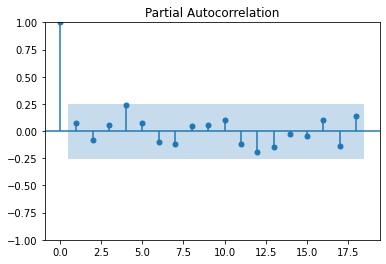

In [12]:
# ⑤ PACF를 통한 데이터 확인 및 시각화
plot_pacf(data)

In [14]:
# ⑥ ARIMA 적용 / ARIMA 모델별로 p,d,q를 다르게 적용해봅니다.
model1 = ARIMA(data, order=(1, 0, 0))
model2 = ARIMA(data, order=(0, 0, 1))
model3 = ARIMA(data, order=(1, 0, 1))

In [15]:
res1 = model1.fit()
res2 = model2.fit()
res3 = model1.fit()

In [16]:
# ⑦ ARIMA 결과 확인
print(res1.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(1, 0, 0)   Log Likelihood                -354.181
Date:                   Wed, 11 Dec 2024   AIC                            714.362
Time:                           13:13:25   BIC                            720.645
Sample:                                0   HQIC                           716.819
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.0429     17.323     17.378      0.000     267.090     334.995
ar.L1          0.0804      0.187      0.430      0.667      -0.286       0.447
sigma2      7848.5795   1363

In [17]:
print(res2.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(0, 0, 1)   Log Likelihood                -354.143
Date:                   Wed, 11 Dec 2024   AIC                            714.286
Time:                           13:13:54   BIC                            720.569
Sample:                                0   HQIC                           716.743
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.3222     17.628     17.094      0.000     266.773     335.872
ma.L1          0.0982      0.179      0.548      0.583      -0.253       0.449
sigma2      7837.9609   1382

In [18]:
print(res3.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(1, 0, 0)   Log Likelihood                -354.181
Date:                   Wed, 11 Dec 2024   AIC                            714.362
Time:                           13:14:02   BIC                            720.645
Sample:                                0   HQIC                           716.819
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.0429     17.323     17.378      0.000     267.090     334.995
ar.L1          0.0804      0.187      0.430      0.667      -0.286       0.447
sigma2      7848.5795   1363

In [19]:
predictions = res2.fittedvalues

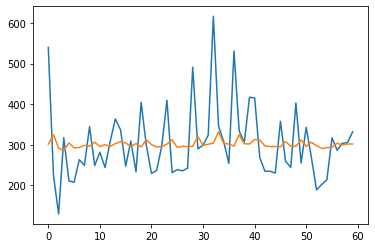

In [20]:
plt.figure()
plt.plot(data)
plt.plot(predictions)
plt.show()

### Auto ARIMA 적용

In [21]:
# ⑧ Auto ARIMA 적용
model = pm.AutoARIMA(seasonal=False, stepwite=True, suppress_warnings=True, trace=True)

In [22]:
res = model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=862.092, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=747.489, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=818.332, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=741.019, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=735.047, Time=0.26 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=724.987, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=723.725, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=722.186, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=791.913, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=716.399, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=714.286, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=712.710, Time=0.0

In [23]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                        SARIMAX   Log Likelihood                -354.355
Date:                Wed, 11 Dec 2024   AIC                            712.710
Time:                        13:18:06   BIC                            716.898
Sample:                             0   HQIC                           714.348
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    300.8733     15.236     19.747      0.000     271.011     330.736
sigma2      7894.7169   1313.366      6.011      0.000    5320.567    1.05e+04
Ljung-Box (L1) (Q):                   0.33   Jarque-